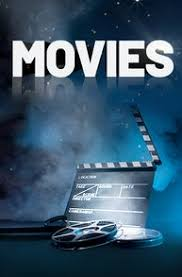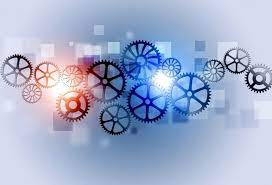

# INTRODUCTION
This notebook is used for the analysis of Microsoft's new movie studio.

## Assignment
However much microsoft wants a new movie studio, there is no knowledge in creating movies. This analysys should be able to show what types of movies are doing well and translate the findings into actionable insights.

## Understanding the data
Below we will import the relevent libraries in order to epxplore the data given and also give meaning to the analysis

In [1]:
#import the relevant libraries 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the data set
df = pd.read_csv('bom.movie_gross.csv.gz')
df1 = pd.read_csv('imdb.title.basics.csv.gz')
df2 = pd.read_csv('imdb.title.ratings.csv.gz')

In [3]:
#explore the different data sets
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


We can see that df shows the title, studio which was used to film it, the domest gross, foreign gross and also the year it was shot
Df1 show the tconst which we will explore its meaning further, its primary tittle, original title, its start year, the runtime in minutes of the movie and its genre
Df2 shows also the tconst, its average rating and also the number of votes


### Explore the data statistically and dropping null values where necessary

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
#changing foreign_gross to a float and also removing the comma
df['foreign_gross'] = df['foreign_gross'].str.replace(',',"")
df['foreign_gross'] = df['foreign_gross'].astype(float)
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [8]:
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [9]:
print("The percantage of Nan in foreign gross column is: ", len(df[df['foreign_gross'].isna()]) / len(df))

The percantage of Nan in foreign gross column is:  0.3985828166519043


However much its percentage of null values is 39% and we are supposed to drop the column, it is difficult to drop the column since we will need to use it in finding the total sales made wordlwide

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
df1.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [12]:
print("The percantage of Nan in runtime minutes column is: ", len(df1[df1['runtime_minutes'].isna()]) / len(df1))
print("The percantage of Nan in genres column is: ", len(df1[df1['genres'].isna()]) / len(df1))

The percantage of Nan in runtime minutes column is:  0.21717620976571053
The percantage of Nan in genres column is:  0.037004598204510616


- However much the runtime column has exceeded a 5% threshold on null values, we cannot drop the entire column since we need it to answer one of our questions 
- We also keep the genres column


In [13]:
#Drop the original_title column
df1.drop('original_title', axis =1, inplace =True)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


This data set has no missing values

In [15]:
#Rename the primary title in df1 to title
df1.rename(columns = {'primary_title' : 'title'}, inplace =True)
df1.columns

Index(['tconst', 'title', 'start_year', 'runtime_minutes', 'genres'], dtype='object')

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   title            146144 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ MB


In [17]:
#rename start_year to year
df1.rename(columns = {'start_year' : 'year'}, inplace=True)

### 1. What genres are doing well based on it Gross profit worldwide?

In [18]:
merged1 = df.merge(df1)
merged1.sort_values(by ='foreign_gross', ascending=False).head()

,title,studio,domestic_gross,foreign_gross,year,tconst,runtime_minutes,genres
1018,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,tt2395427,141.0,"Action,Adventure,Sci-Fi"
1697,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,tt4881806,128.0,"Action,Adventure,Sci-Fi"
617,Frozen,BV,400700000.0,875700000.0,2013,tt2294629,102.0,"Adventure,Animation,Comedy"
1504,Wolf Warrior 2,HC,2700000.0,867600000.0,2017,tt7131870,123.0,"Action,Drama,Thriller"
811,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014,tt2109248,165.0,"Action,Adventure,Sci-Fi"


Text(0, 0.5, 'Total in $B')

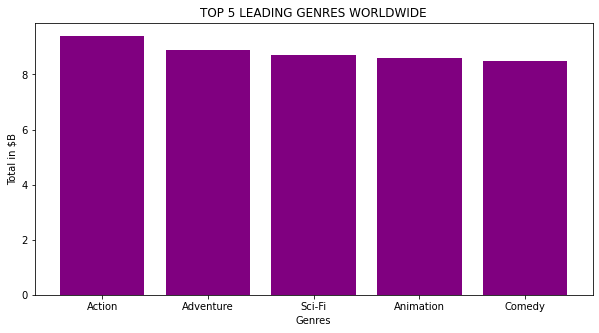

In [19]:
#Bar chart showing the top genres wordwide based on
#its gross profit wordwide

ax = plt.subplots(figsize= (10,5))
bar_chart_genres =['Action','Adventure','Sci-Fi','Animation','Comedy']
bar_chart_title ='TOP 5 LEADING GENRES WORLDWIDE'
bar_chart_total_money = 'Total in $B'
bar_chart_genre_label = 'Genres'

x_axis = bar_chart_genres
y_axis = [9.4,8.9,8.7,8.6,8.5]


plt.bar(x_axis,y_axis,color = 'purple')
plt.title(bar_chart_title)
plt.xlabel(bar_chart_genre_label, color = 'black')
plt.ylabel(bar_chart_total_money, color = 'black')

## 2. Studios that are performing well based on their gross profit

In [20]:
#combining the studio column with the foreign gross
studio_gross = df[['studio', 'foreign_gross']]
studio_gross.sort_values(by = 'foreign_gross',ascending=False).head()

,studio,foreign_gross
328,WB,960500000.0
1875,BV,946400000.0
727,BV,895500000.0
3081,Uni.,891800000.0
1127,BV,875700000.0


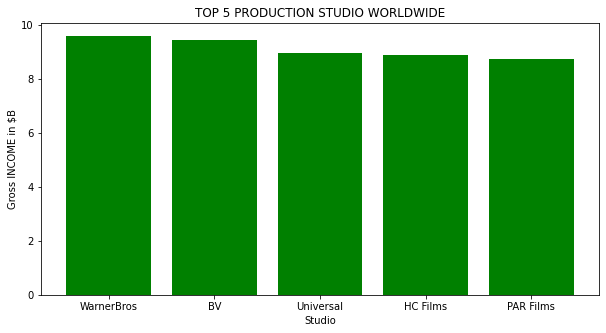

In [21]:
#Bar chart to show studios that are performing well based on  gross profit
#We can see that WB is WarnerBros and Uni is Universal
ax = plt.subplots(figsize= (10,5))

bar_chart_studio =['WarnerBros','BV','Universal','HC Films','PAR Films']
bar_chart_title ='TOP 5 PRODUCTION STUDIO WORLDWIDE'
bar_chart_total_money = 'Gross INCOME in $B'
bar_chart_studio_label = 'Studio'

x_axis = bar_chart_studio
y_axis = [9.60,9.46,8.95,8.91,8.75]


plt.bar(x_axis,y_axis, color = 'green')
plt.title(bar_chart_title)
plt.xlabel(bar_chart_studio_label,color = 'black')
plt.ylabel(bar_chart_total_money,color = 'black')
plt.show()

## 3. Top 5 movies with the highest Gross profit worldwide

In [22]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [23]:
#combine the title column and foreing gross column
ti_gross=df[['title','foreign_gross','studio']]
ti_gross.sort_values(by = 'foreign_gross', ascending=False).head()

,title,foreign_gross,studio
328,Harry Potter and the Deathly Hallows Part 2,960500000.0,WB
1875,Avengers: Age of Ultron,946400000.0,BV
727,Marvel's The Avengers,895500000.0,BV
3081,Jurassic World: Fallen Kingdom,891800000.0,Uni.
1127,Frozen,875700000.0,BV


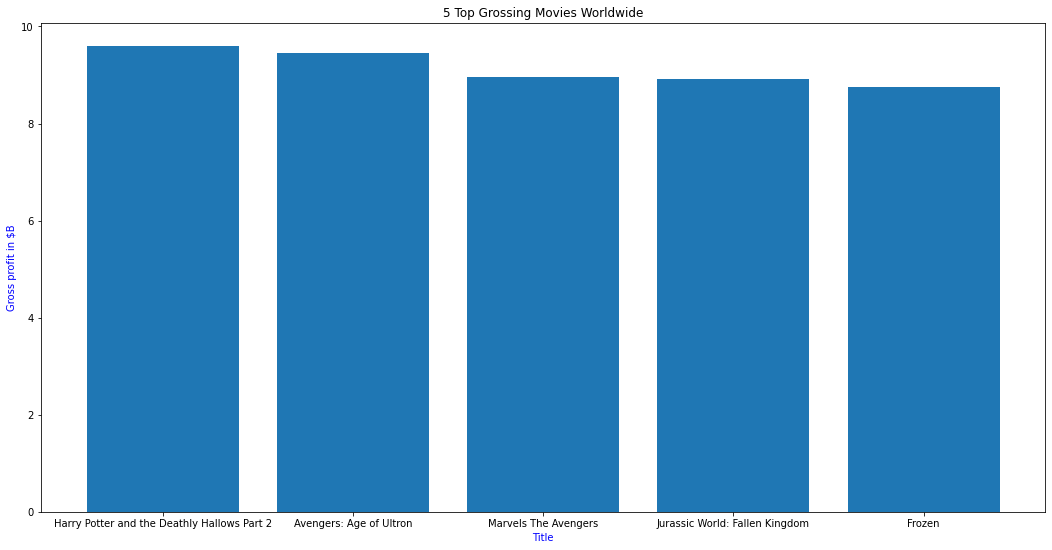

In [24]:
#A bar chart to show profit by 5 top movies with the highest gross worldwide

ax = plt.subplots(figsize= (18,9))
bar_chart_title_movie =['Harry Potter and the Deathly Hallows Part 2','Avengers: Age of Ultron',
                'Marvels The Avengers','Jurassic World: Fallen Kingdom','Frozen']
bar_chart_title ='5 Top Grossing Movies Worldwide'
bar_chart_total_money = 'Gross profit in $B'
bar_chart_movie_title = 'Title' 

x_axis = bar_chart_title_movie
y_axis = [9.60,9.46,8.95,8.91,8.75]

plt.bar(x_axis,y_axis)
plt.title(bar_chart_title)
plt.xlabel(bar_chart_movie_title, color= 'blue') 
plt.ylabel(bar_chart_total_money,color= 'blue' )
plt.show()

In [25]:
top_movie = df.join(df2)
top_movie

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt10356526,8.3,31
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,tt10384606,8.9,559
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,tt1042974,6.4,20
3,Inception,WB,292600000.0,535700000.0,2010,tt1043726,4.2,50352
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt1060240,6.5,21
...,...,...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,tt1733120,6.8,19
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,tt1733300,5.3,15
3384,El Pacto,Sony,2500.0,NaN,2018,tt1734082,7.8,17
3385,The Swan,Synergetic,2400.0,NaN,2018,tt1736040,3.0,61


In [26]:
top_movie['averagerating'].max()

9.8

In [34]:
#to find the movie with the highest rating
top_movie_ =top_movie.groupby(['averagerating','title']).sum()
top_movie_

domestic_gross  foreign_gross  year  \
averagerating title                                                             
1.0           Black Nativity                   7000000.0       436000.0  2013   
              Buck                             4000000.0            0.0  2011   
1.1           The 33                          12200000.0     12700000.0  2015   
1.2           Far from the Madding Crowd      12200000.0     18000000.0  2015   
              Human Capital                     159000.0            0.0  2015   
...                                                  ...            ...   ...   
9.4           New Year's Eve                  54500000.0     87500000.0  2011   
9.5           Another Happy Day                   8500.0       347000.0  2011   
              She's Funny That Way              112000.0            0.0  2015   
9.7           Point Blank                       708000.0      8500000.0  2011   
9.8           The Wedding Plan                 1400000.0            0.0  2017   

                                          numvotes  
averagerating title                                 
1.0           Black Nativity                   449  
              Buck                              67  
1.1           The 33                           598  
1.2           Far from the Madding Crowd        86  
              Human Capital                      5  
...                                            ...  
9.4           New Year's Eve                    18  
9.5           Another Happy Day                  6  
              She's Funny That Way             140  
9.7           Point Blank                        6  
9.8           The Wedding Plan                   5  

[3387 rows x 4 columns]

- From the visualizations, we can see that Action is the leading genre wordlwide with a gross prfit of 9.8 Billion USD
- WanerBros is the leading studio in film production since it has the highest gross profit of 9.6 Billion USD
- Harry Potter and the Deathly Hallows Part2 has sold the highest amount of films worldwide with a gross profit of 9.60 Billion USD

In [29]:
#top_movie_.plot(kind='barh')

### Conclusions
- Movies with action genre sell higher than other genres

## Recomendations
It is adviced that microsoft invest in movies that are of action genre